In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('and.csv')
df.head()

,x1,x2,and
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [43]:
X = df.iloc[ : , 0 : 2]
y = df.iloc[ : , -1]

In [44]:
def step(z):
    return 1 if z >= 0 else 0

In [47]:
def perceptron(X, y):
    epochs = 100
    X = np.insert(X.values, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    learning_rate = 0.1
    for _ in range(epochs):
        i = np.random.randint(0, X.shape[1])
        y_hat = step(np.dot(X[i], weights))
        weights = weights + learning_rate * (y[i] - y_hat) * X[i]
    
    return weights[0], weights[1 : ]

In [50]:
clf = perceptron(X, y)
intercept_ = clf[0]
coef_ = clf[1]

In [52]:
# mapping to the y = mx + c
m = -(coef_[0] / coef_[1])
c = -(intercept_ / coef_[1])

In [54]:
X_input = df[['x1', 'x2']]
y_input = m * X_input + c

(-0.5, 1.8)

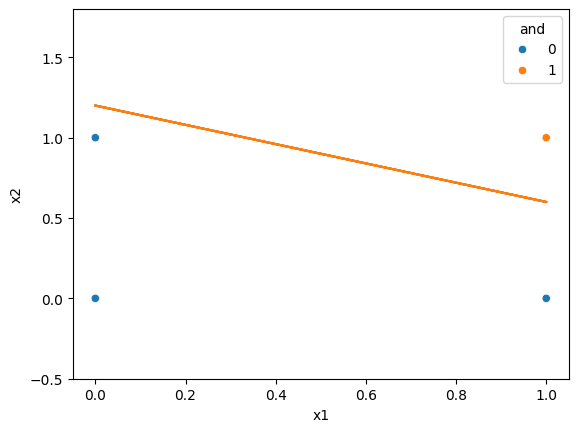

In [62]:
plt.plot(X_input, y_input)
sns.scatterplot(x = 'x1', y = 'x2', hue = 'and', data = df, legend = 2)
plt.ylim(-0.5, 1.8)